In [1]:
import pickle
from scipy.io import loadmat,savemat
import numpy as np
from numpy import clip
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore")
#plt.rcParams['axes.color_cycle']='r'
plt.rcParams['lines.linewidth'] = 1.5

In [3]:
from mealpy.human_based import TLO
from mealpy.physics_based import EO
from mealpy.math_based import CGO,GBO

In [4]:
import matlab.engine

In [5]:
eng = matlab.engine.start_matlab()

In [29]:
counter = 0
results_hist = []
last_run = None
LC=0.01
def run_sim(x0):
    global last_run,lowerbound,upperbound,LC
    P1,I1,D1,P2,I2,D2=x0
    inputs = loadmat("Input.mat")
    inp_pos = [P1,I1,D1,P2,I2,D2]
    inp_pos= clip(inp_pos, lowerbound, upperbound)
    inputs["P1"] = inp_pos[0];inputs["I1"] = inp_pos[1];inputs["D1"] = inp_pos[2];
    inputs["P2"] = inp_pos[3];inputs["I2"] = inp_pos[4];inputs["D2"] = inp_pos[5];
    inputs["LC"] = LC
    savemat("Input.mat",inputs)
    eng.model_run(nargout=0)
    outputs = loadmat("Output.mat")
    last_run = outputs
    return outputs

def cost(x0,save=False):
    data = run_sim(x0)
    c = data["cost"][0][0]
    return c

def f(x):
    n_particles = x.shape[0]
    j = [cost(x[i]) for i in range(n_particles)]
    return np.array(j)

In [30]:
def loadData():
    # for reading also binary mode is important
    dbfile = open('MATLAB_OPT_Results', 'rb')     
    db = pickle.load(dbfile)
    for keys in db:
        ##print(keys, '=>', db[keys])
        pass
    dbfile.close()
    return db

In [31]:
def get_point(results):
    point={}
    point["P1"] = results["P1"][0][0];point["I1"] = results["I1"][0][0];point["D1"] = results["D1"][0][0]
    point["P2"] = results["P2"][0][0];point["I2"] = results["I2"][0][0];point["D2"] = results["D2"][0][0]
    #point = list(point.values())
    return point

In [37]:
verbose = True  # Print out the training results
epoch = 10  # Number of iterations / generations / epochs
pop_size = 10  # Populations size (Number of individuals / Number of solutions)
lowerbound = [0,0,0,0,0,0]
upperbound = [5,5,5,5,5,5]
problem_dict1 = {
    "fit_func": cost,
    "lb": lowerbound,
    "ub": upperbound,
    "minmax": "min",
    "verbose": True,
    }

In [38]:
cost(6*[0.5])

0.04191466817685144

In [39]:
TLBO_sol = TLO.BaseTLO(problem_dict1,epoch=epoch, pop_size=pop_size)
EO_sol = EO.BaseEO(problem_dict1,epoch=epoch, pop_size=pop_size)
CGO_sol = CGO.OriginalCGO(problem_dict1,epoch=epoch, pop_size=pop_size)
GBO_sol = GBO.OriginalGBO(problem_dict1,epoch=epoch, pop_size=pop_size)

In [40]:
TLBO_solve= TLBO_sol.solve()

> Epoch: 1, Current best: 0.003941117461959881, Global best: 0.003941117461959881, Runtime: 3.94505 seconds
> Epoch: 2, Current best: 0.0032350493643020528, Global best: 0.0032350493643020528, Runtime: 3.97911 seconds
> Epoch: 3, Current best: 0.0018612833163913053, Global best: 0.0018612833163913053, Runtime: 4.30463 seconds
> Epoch: 4, Current best: 0.0016614463303226243, Global best: 0.0016614463303226243, Runtime: 3.92587 seconds
> Epoch: 5, Current best: 0.0015150685995124053, Global best: 0.0015150685995124053, Runtime: 3.93846 seconds
> Epoch: 6, Current best: 0.0015150685995124053, Global best: 0.0015150685995124053, Runtime: 3.88037 seconds
> Epoch: 7, Current best: 0.001439938162790612, Global best: 0.001439938162790612, Runtime: 3.95567 seconds
> Epoch: 8, Current best: 0.0014277597689998263, Global best: 0.0014277597689998263, Runtime: 3.86664 seconds
> Epoch: 9, Current best: 0.0014169413987081842, Global best: 0.0014169413987081842, Runtime: 3.87963 seconds
> Epoch: 10, C

In [41]:
EO_solve= EO_sol.solve()

> Epoch: 1, Current best: 0.003971433829252647, Global best: 0.003929938207991439, Runtime: 2.20337 seconds
> Epoch: 2, Current best: 0.0039809485927405144, Global best: 0.003929938207991439, Runtime: 2.13602 seconds
> Epoch: 3, Current best: 0.004011356112107615, Global best: 0.003929938207991439, Runtime: 2.14160 seconds
> Epoch: 4, Current best: 0.0024924311809088927, Global best: 0.0024924311809088927, Runtime: 2.22836 seconds
> Epoch: 5, Current best: 0.002554481933589666, Global best: 0.0024924311809088927, Runtime: 2.25203 seconds
> Epoch: 6, Current best: 0.0023407708170520335, Global best: 0.0023407708170520335, Runtime: 2.47194 seconds
> Epoch: 7, Current best: 0.0021180619781444865, Global best: 0.0021180619781444865, Runtime: 2.34202 seconds
> Epoch: 8, Current best: 0.0020129228230145483, Global best: 0.0020129228230145483, Runtime: 2.35051 seconds
> Epoch: 9, Current best: 0.0019833649461260426, Global best: 0.0019833649461260426, Runtime: 3.09703 seconds
> Epoch: 10, Cur

In [43]:
CGO_solve= CGO_sol.solve()

> Epoch: 1, Current best: 0.001270879103370691, Global best: 0.001270879103370691, Runtime: 7.84039 seconds
> Epoch: 2, Current best: 0.001270879103370691, Global best: 0.001270879103370691, Runtime: 8.13939 seconds
> Epoch: 3, Current best: 0.001270879103370691, Global best: 0.001270879103370691, Runtime: 8.04735 seconds
> Epoch: 4, Current best: 0.001270879103370691, Global best: 0.001270879103370691, Runtime: 7.65410 seconds
> Epoch: 5, Current best: 0.001270879103370691, Global best: 0.001270879103370691, Runtime: 7.94147 seconds
> Epoch: 6, Current best: 0.001270879103370691, Global best: 0.001270879103370691, Runtime: 7.77617 seconds
> Epoch: 7, Current best: 0.001270879103370691, Global best: 0.001270879103370691, Runtime: 7.78423 seconds
> Epoch: 8, Current best: 0.001270879103370691, Global best: 0.001270879103370691, Runtime: 7.69717 seconds
> Epoch: 9, Current best: 0.001270879103370691, Global best: 0.001270879103370691, Runtime: 7.75257 seconds
> Epoch: 10, Current best: 0

IndexError: index 11 is out of bounds for axis 0 with size 11

In [44]:
GBO_solve= GBO_sol.solve()

> Epoch: 1, Current best: 0.0013314974163887892, Global best: 0.0013314974163887892, Runtime: 2.00638 seconds
> Epoch: 2, Current best: 0.001270879103370691, Global best: 0.001270879103370691, Runtime: 1.97968 seconds
> Epoch: 3, Current best: 0.001270879103370691, Global best: 0.001270879103370691, Runtime: 2.01562 seconds
> Epoch: 4, Current best: 0.001270879103370691, Global best: 0.001270879103370691, Runtime: 2.00512 seconds
> Epoch: 5, Current best: 0.001270879103370691, Global best: 0.001270879103370691, Runtime: 2.05774 seconds
> Epoch: 6, Current best: 0.00129497972157204, Global best: 0.001270879103370691, Runtime: 1.99171 seconds
> Epoch: 7, Current best: 0.001270879103370691, Global best: 0.001270879103370691, Runtime: 2.02436 seconds
> Epoch: 8, Current best: 0.001270879103370691, Global best: 0.001270879103370691, Runtime: 1.98569 seconds
> Epoch: 9, Current best: 0.001270879103370691, Global best: 0.001270879103370691, Runtime: 2.01232 seconds
> Epoch: 10, Current best: 

In [130]:
TLBO_solve

(array([1., 1., 1., 1., 1., 1.]), 0.016924935176992974)

In [125]:
TLBO_solve[1],EO_solve[1],VCS_solve[1]

(0.016924935176992974, 0.02628120373600655, 0.03473140841431043)

In [47]:
results_EO = run_sim(EO_solve[0])
results_TLBO = run_sim(TLBO_solve[0])
results_CGO = run_sim(CGO_solve[0])
results_GBO = run_sim(GBO_solve[0])

In [49]:
t = results_TLBO["t_var"]
#t_true = np.where(t<=6,True,False)
#t = np.array(t)[t_true]

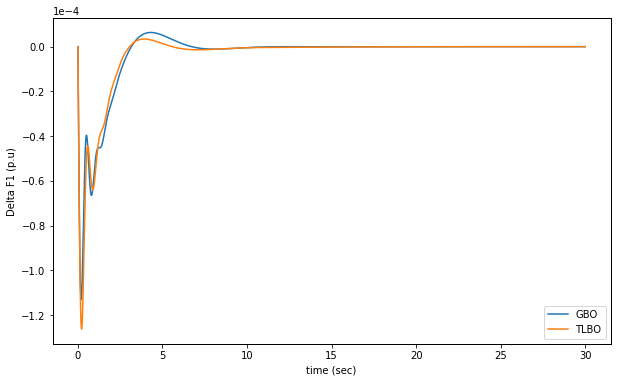

In [57]:
fig = plt.subplots(figsize=[10,6])
#plt.plot(t,results_CGO["df1"],label='CGO')
plt.plot(t,results_GBO["df1"],label='GBO')
plt.plot(t,results_TLBO["df1"],label='TLBO')
#plt.plot(t,results_EO["df1"],label='EO')
#plt.title("",)
plt.ylabel("Delta F1 (p.u)")
plt.xlabel("time (sec)")
#ticker = matplotlib.ticker.EngFormatter(unit='')
#fig[1].yaxis.set_major_formatter(ticker)
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,0))
plt.setp(fig[1].spines.values(), linewidth=1)
#plt.setp(fig[1].yaxis.label)
plt.legend()
plt.savefig("fig1.png",dpi=400)

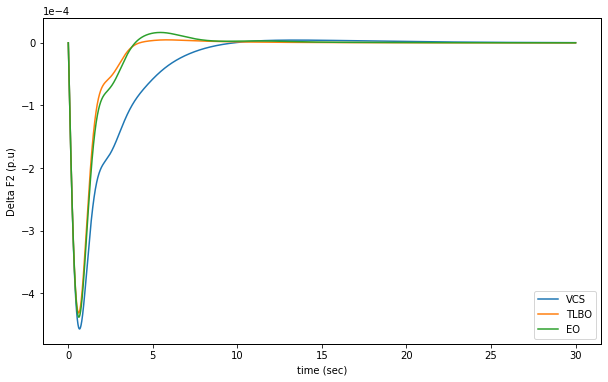

In [136]:
fig = plt.subplots(figsize=[10,6])
plt.plot(t,results_VCS["df2"],label='VCS')
plt.plot(t,results_TLBO["df2"],label='TLBO')
plt.plot(t,results_EO["df2"],label='EO')
#plt.title("",)
plt.ylabel("Delta F2 (p.u)")
plt.xlabel("time (sec)")
#ticker = matplotlib.ticker.EngFormatter(unit='')
#fig[1].yaxis.set_major_formatter(ticker)
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,0))
plt.setp(fig[1].spines.values(), linewidth=1)
#plt.setp(fig[1].yaxis.label)
plt.legend()
plt.savefig("fig2.png",dpi=400)

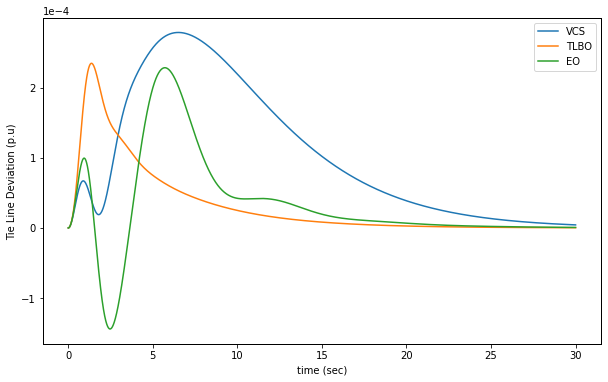

In [137]:
fig = plt.subplots(figsize=[10,6])
plt.plot(t,results_VCS["df_tie"],label='VCS')
plt.plot(t,results_TLBO["df_tie"],label='TLBO')
plt.plot(t,results_EO["df_tie"],label='EO')
#plt.title("",)
plt.ylabel("Tie Line Deviation (p.u)")
plt.xlabel("time (sec)")
#ticker = matplotlib.ticker.EngFormatter(unit='')
#fig[1].yaxis.set_major_formatter(ticker)
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,0))
plt.setp(fig[1].spines.values(), linewidth=1)
#plt.setp(fig[1].yaxis.label)
plt.legend()
plt.savefig("fig3.png",dpi=400)